In [165]:
import datetime as dt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

44KO0AHG19ZY1W42


In [166]:
import yfinance as yf
import pandas as pd

# Define the ticker symbols of companies
ticker_symbols = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']

# Specify the time period for data retrieval
start_date = '2020-01-01'
end_date = '2023-01-15'

# Create an empty DataFrame to store the data
historical_data = pd.DataFrame()

# Iterate over each ticker symbol and retrieve historical data
for ticker_symbol in ticker_symbols:
    # Download historical data for the current ticker symbol
    # Set auto_adjust=False to get both unadjusted and adjusted close prices
    data = yf.download(ticker_symbol, start=start_date, end=end_date, auto_adjust=False, actions=False)

    # Extract adjusted close prices and rename the column
    adj_close = data['Adj Close'].squeeze()  # Convert to Series
    adj_close = adj_close.rename(ticker_symbol)

    # Add the adjusted close prices to the historical_data DataFrame
    historical_data = pd.concat([historical_data, adj_close], axis=1)

# Display the first few rows of the combined dataset
print(historical_data.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

                          AAPL        MSFT       AMZN       GOOG        META
2020-01-02 00:00:00  72.796036  153.630707  94.900497  68.201012  209.150269
2020-01-03 00:00:00  72.088303  151.717743  93.748497  67.866325  208.043610
2020-01-06 00:00:00  72.662712  152.109848  95.143997  69.539726  211.961823
2020-01-07 00:00:00  72.320984  150.722977  95.343002  69.496330  212.420425
2020-01-08 00:00:00  73.484344  153.123779  94.598503  70.043991  214.573959


In [167]:
historical_data

,AAPL,MSFT,AMZN,GOOG,META
2020-01-02 00:00:00,72.796036,153.630707,94.900497,68.201012,209.150269
2020-01-03 00:00:00,72.088303,151.717743,93.748497,67.866325,208.043610
2020-01-06 00:00:00,72.662712,152.109848,95.143997,69.539726,211.961823
2020-01-07 00:00:00,72.320984,150.722977,95.343002,69.496330,212.420425
2020-01-08 00:00:00,73.484344,153.123779,94.598503,70.043991,214.573959
...,...,...,...,...,...
2023-01-09 00:00:00,128.795593,223.452911,87.360001,88.582458,129.081360
2023-01-10 00:00:00,129.369568,225.154938,89.870003,89.021378,132.590775
2023-01-11 00:00:00,132.100830,231.963242,95.089996,92.033989,132.491089
2023-01-12 00:00:00,132.021667,234.658981,95.269997,91.684845,136.299622


EDA

# EDA


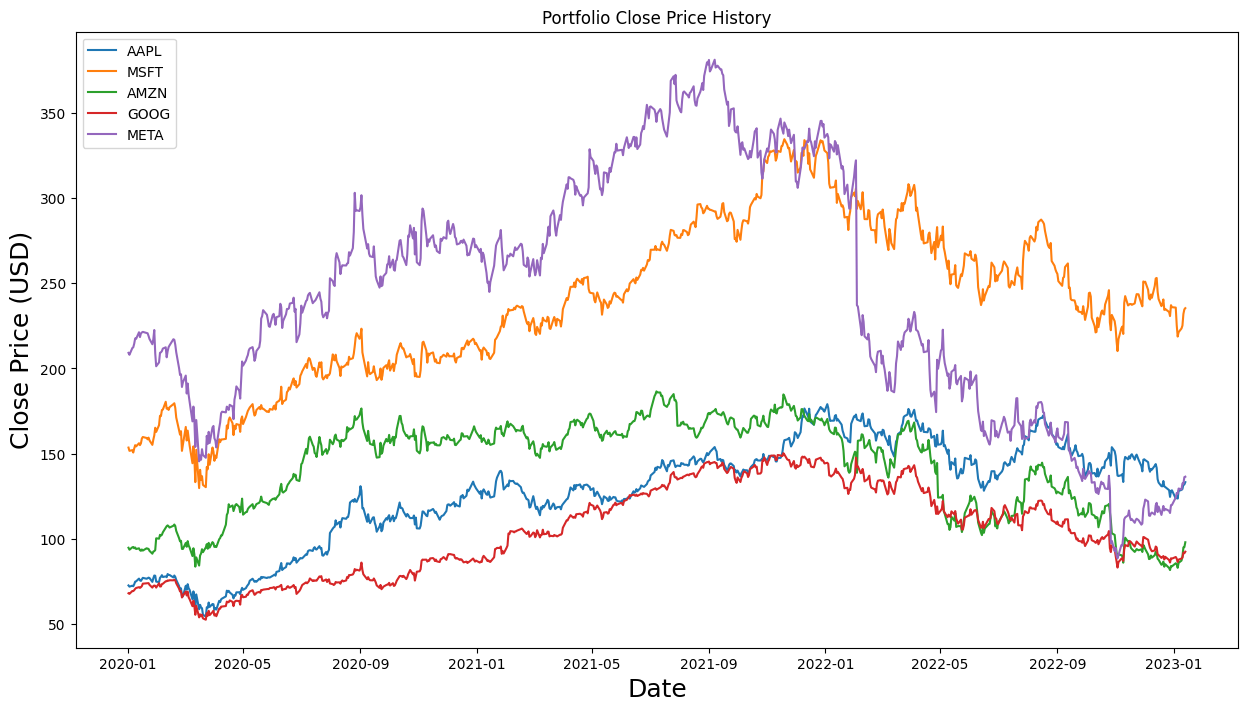

In [168]:
#set plot size
fig = plt.figure(figsize=(15,8))

# iterate through and add plot to figure
for value in historical_data.columns.values:
    plt.plot(historical_data[value], label = value)

# set plot title
plt.title("Portfolio Close Price History")
# set x-axis label
plt.xlabel("Date", fontsize=18)
# set y-axis label
plt.ylabel("Close Price (USD)", fontsize=18)
# plot details
plt.legend(historical_data.columns.values, loc = "upper left")
# show plot
plt.show(fig)

In [169]:
# calculate correlation matrix
corr_matrix = historical_data.corr(method="pearson")
# display dataframe
corr_matrix

,AAPL,MSFT,AMZN,GOOG,META
AAPL,1.000000,0.916570,0.395277,0.851925,0.163415
MSFT,0.916570,1.000000,0.517887,0.963613,0.392838
AMZN,0.395277,0.517887,1.000000,0.549561,0.857374
GOOG,0.851925,0.963613,0.549561,1.000000,0.490292
META,0.163415,0.392838,0.857374,0.490292,1.000000


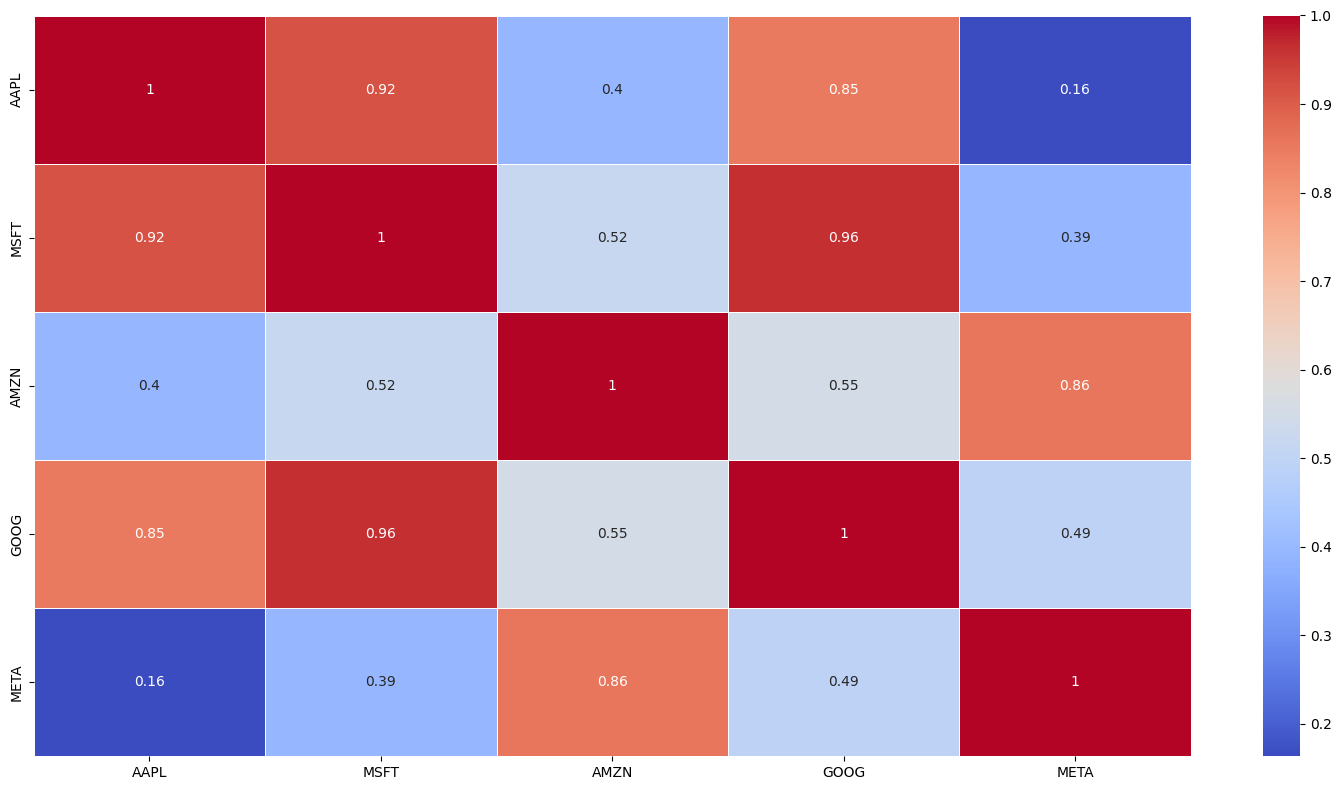

In [170]:
# Set figure size
fig = plt.figure(figsize=(15, 8))

# Plot heatmap with the 'coolwarm' colormap
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns,
            cmap="coolwarm", annot=True, linewidth=0.5)

# Adjust layout for better fit
plt.tight_layout()

# Display the figure
plt.show()

In [171]:
# derive daily simple returns and drop NaN rows
returns_D1 = historical_data.pct_change(1).dropna()
# display dataframe
returns_D1

,AAPL,MSFT,AMZN,GOOG,META
2020-01-03 00:00:00,-0.009722,-0.012452,-0.012139,-0.004907,-0.005291
2020-01-06 00:00:00,0.007968,0.002584,0.014886,0.024657,0.018834
2020-01-07 00:00:00,-0.004703,-0.009118,0.002092,-0.000624,0.002164
2020-01-08 00:00:00,0.016086,0.015929,-0.007809,0.007880,0.010138
2020-01-09 00:00:00,0.021241,0.012493,0.004799,0.011044,0.014311
...,...,...,...,...,...
2023-01-09 00:00:00,0.004089,0.009736,0.014870,0.007259,-0.004230
2023-01-10 00:00:00,0.004456,0.007617,0.028732,0.004955,0.027188
2023-01-11 00:00:00,0.021112,0.030238,0.058084,0.033841,-0.000752
2023-01-12 00:00:00,-0.000599,0.011621,0.001893,-0.003794,0.028746


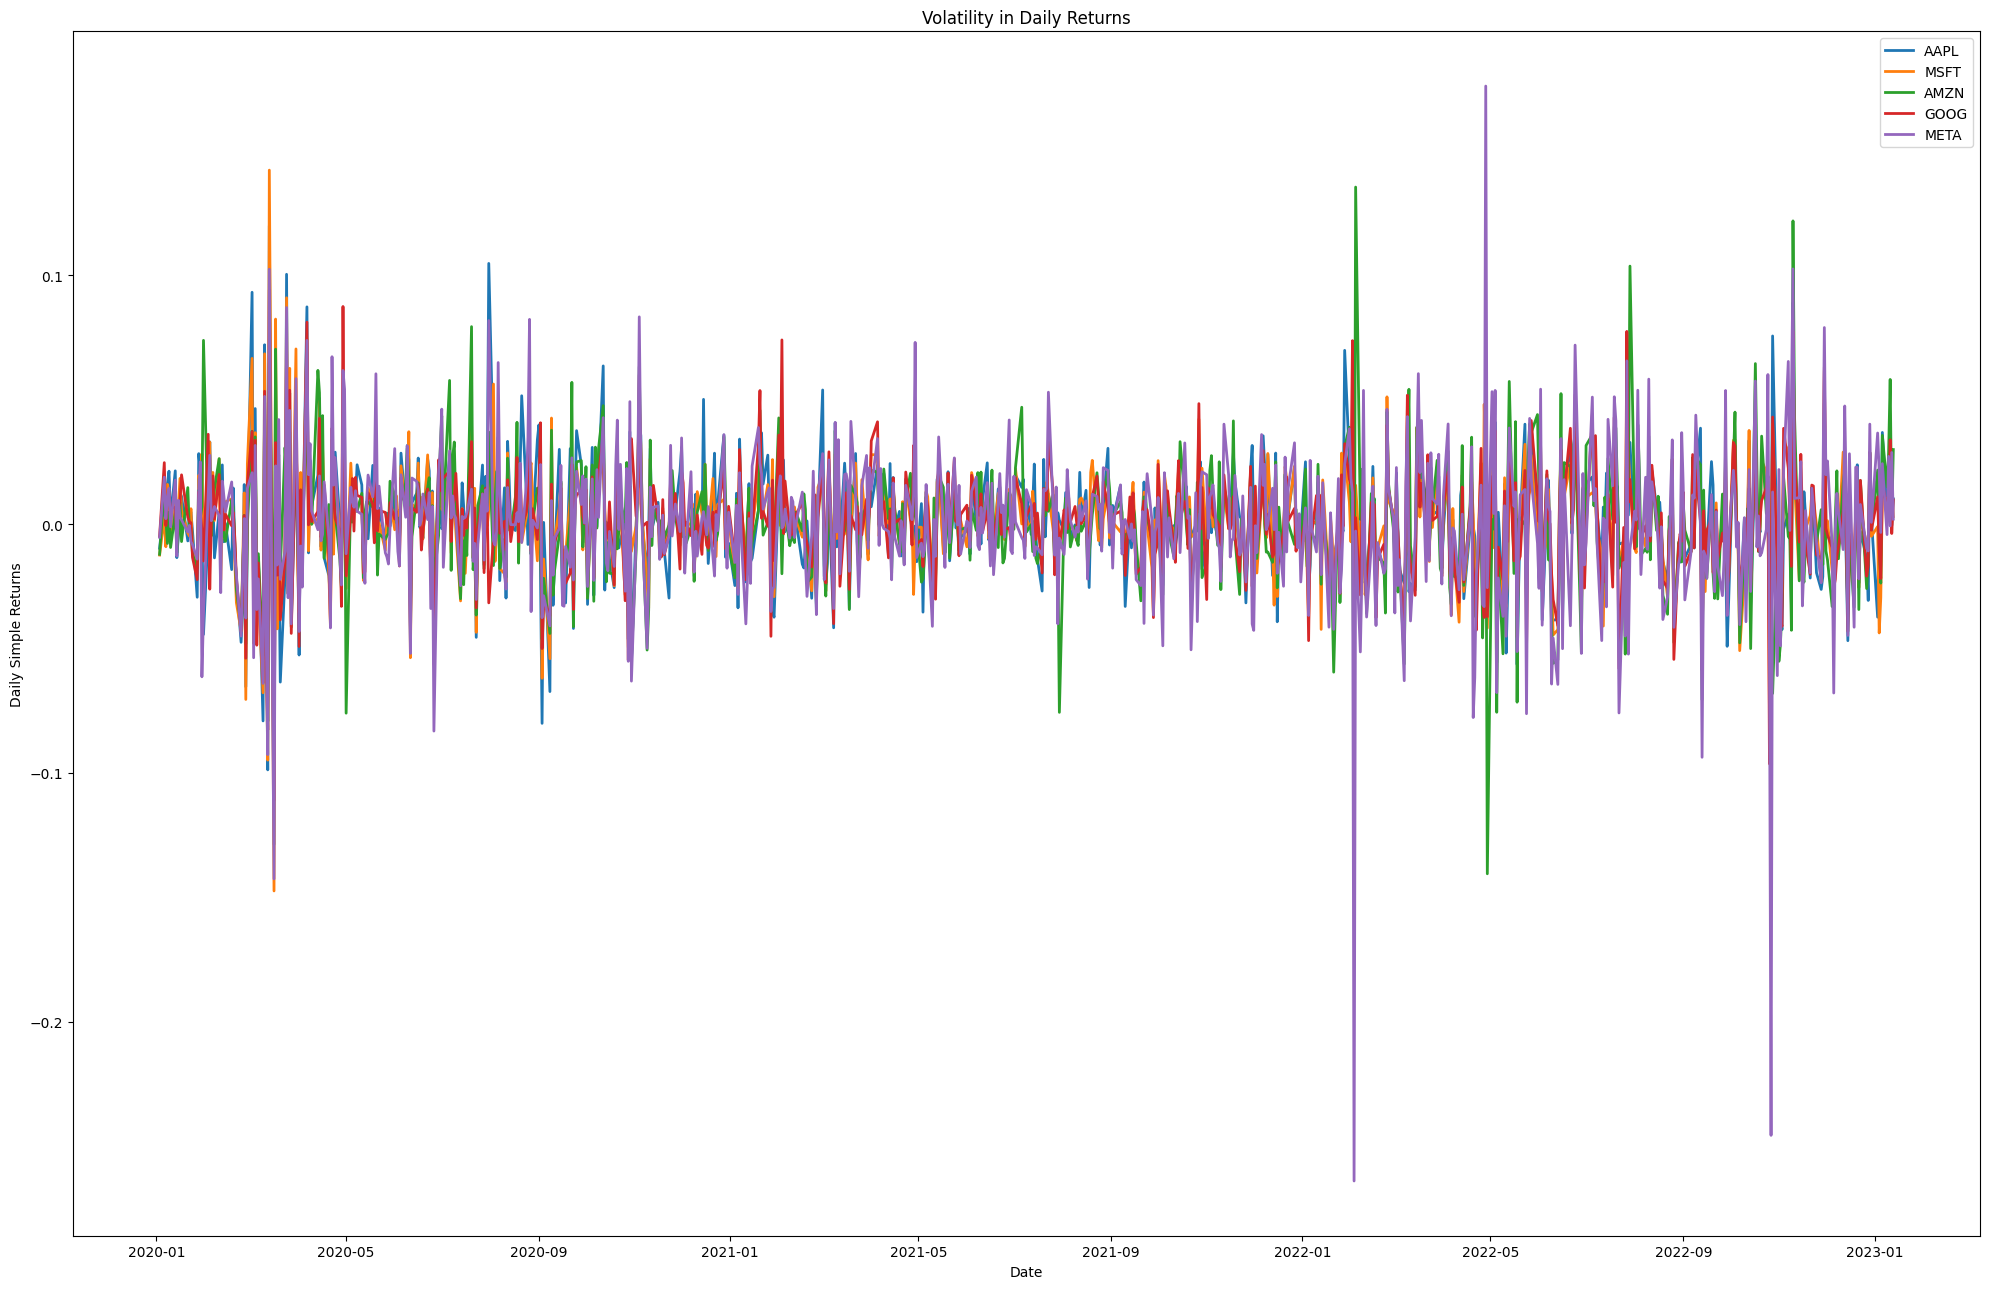

In [172]:
# set figure size
fig=plt.figure(figsize=(20,13))

# add respective plots to figure
for returns in returns_D1.columns.values:
    plt.plot(returns_D1[returns], lw=2, label = returns)

# plot labelling
plt.title("Volatility in Daily Returns")
plt.xlabel("Date")
plt.ylabel("Daily Simple Returns")
plt.legend(loc = "upper right", fontsize = 10)

# little margin for plot
plt.tight_layout()

# save plot and display
plt.show(fig)

In [173]:
# derive the average returns
avg_D1 = returns_D1.mean()
avg_D1 * 100

,0
AAPL,0.106189
MSFT,0.079816
AMZN,0.034772
GOOG,0.063308
META,-0.007350


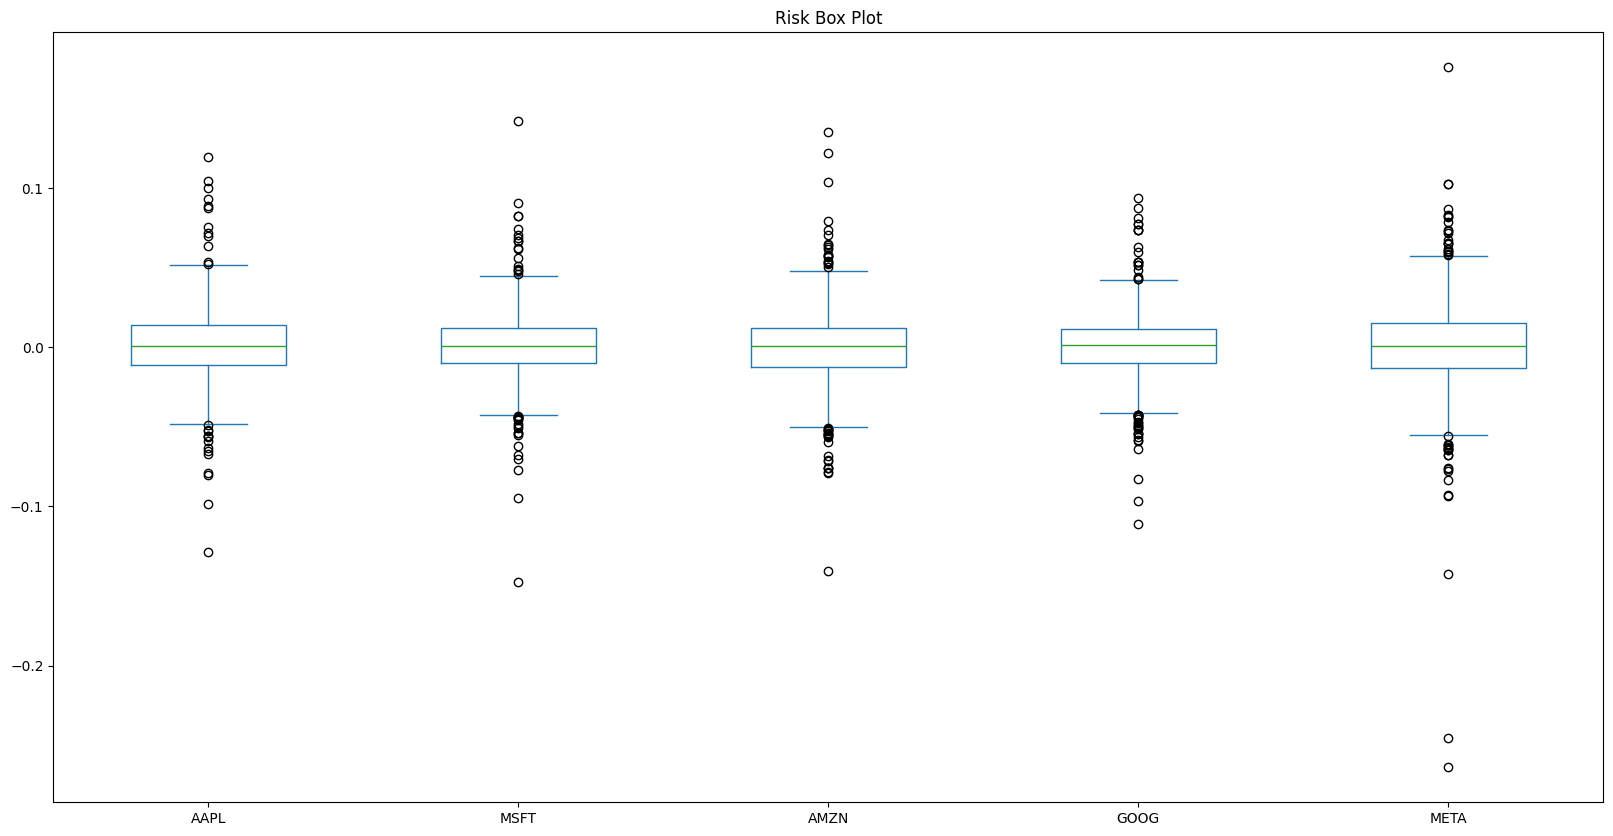

In [174]:
plot = returns_D1.plot(kind = "box", figsize = (20,10), title = "Risk Box Plot")

In [175]:
# derive standard deviation
returns_D1.std() * np.sqrt(252) * 100

,0
AAPL,36.871395
MSFT,34.749323
AMZN,39.175077
GOOG,34.276072
META,48.571027


In [209]:
(avg_D1 - 0.00036) / (returns_D1.std() * np.sqrt(252)) * 100 #(risk free rate, to sharpe ratio)

,0
AAPL,0.190362
MSFT,0.126091
AMZN,-0.003135
GOOG,0.079671
META,-0.089250


In [210]:
# derive cummulative product of daily returns
cumm_returns = (returns_D1 + 1).cumprod()
cumm_returns

,AAPL,MSFT,AMZN,GOOG,META
2020-01-03 00:00:00,0.990278,0.987548,0.987861,0.995093,0.994709
2020-01-06 00:00:00,0.998169,0.990101,1.002566,1.019629,1.013443
2020-01-07 00:00:00,0.993474,0.981073,1.004663,1.018993,1.015635
2020-01-08 00:00:00,1.009455,0.996700,0.996818,1.027023,1.025932
2020-01-09 00:00:00,1.030897,1.009152,1.001602,1.038366,1.040614
...,...,...,...,...,...
2023-01-09 00:00:00,1.769267,1.454481,0.920543,1.298844,0.617170
2023-01-10 00:00:00,1.777151,1.465559,0.946992,1.305279,0.633950
2023-01-11 00:00:00,1.814671,1.509876,1.001997,1.349452,0.633473
2023-01-12 00:00:00,1.813583,1.527422,1.003894,1.344333,0.651683


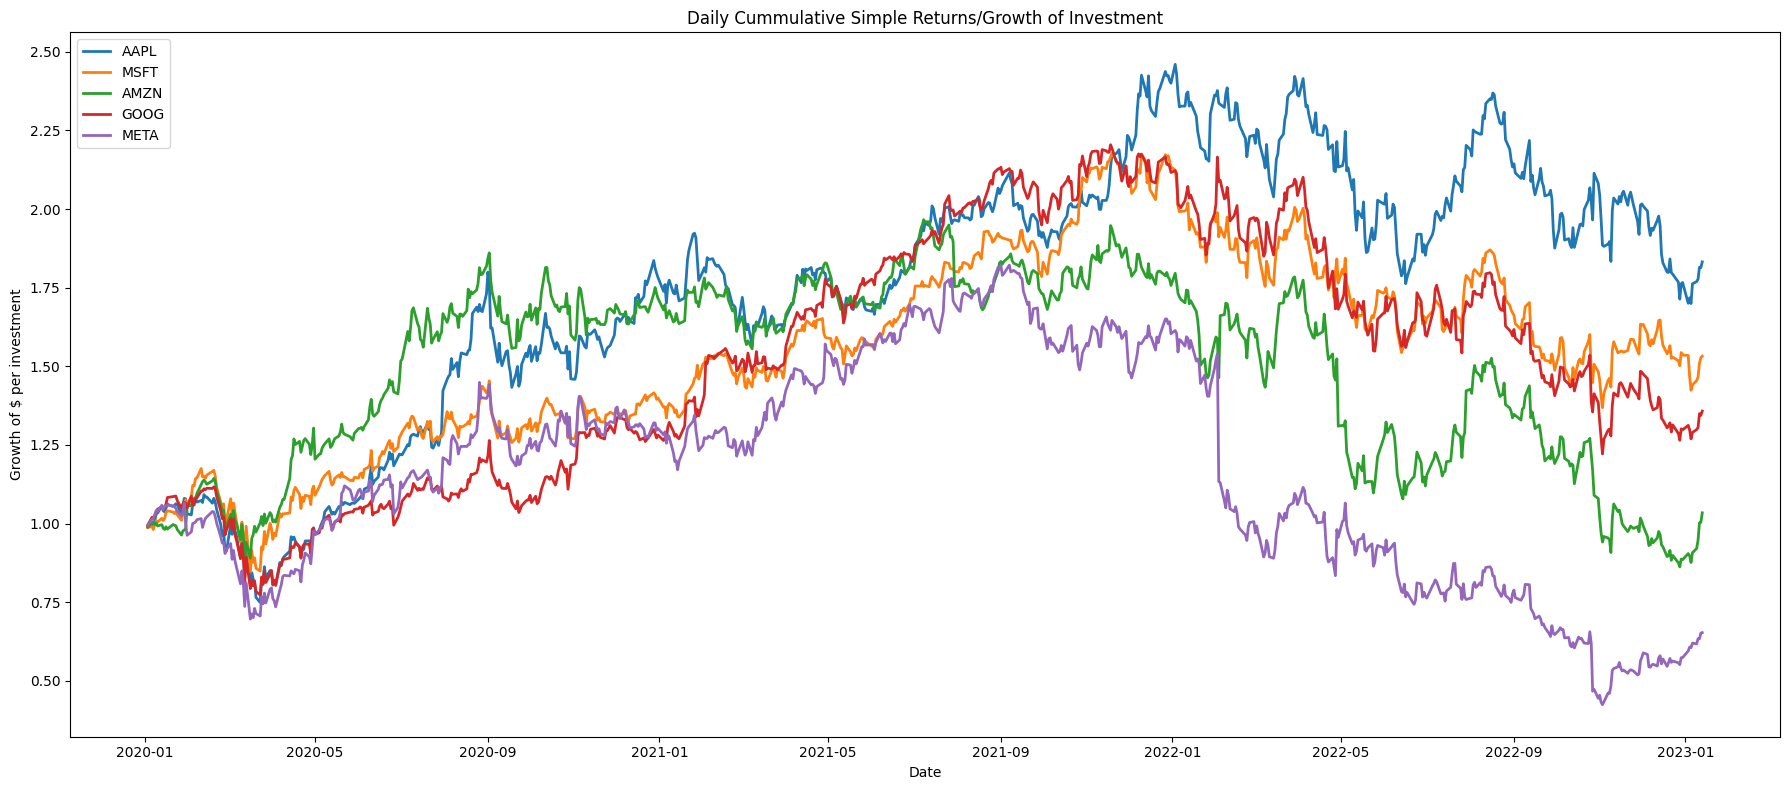

In [211]:
fig = plt.figure(figsize=(18,8))

# add respective plots to figure
for returns in cumm_returns.columns.values:
    plt.plot(cumm_returns[returns], lw=2, label = returns)

# plots labels
plt.legend(loc = "upper left", fontsize=10)
plt.title("Daily Cummulative Simple Returns/Growth of Investment")
plt.xlabel("Date")
plt.ylabel("Growth of $ per investment")
plt.tight_layout()

# save plot and display
plt.show(fig)

Conclusions


In [179]:
# 1. Descriptive Statistics
print(historical_data.describe())

             AAPL        MSFT        AMZN        GOOG        META
count  765.000000  765.000000  765.000000  765.000000  765.000000
mean   127.947498  238.731747  141.832960  104.443459  243.294241
std     30.317068   47.096073   28.279170   26.635311   73.416463
min     54.509762  129.881027   81.820000   52.701576   88.643105
25%    113.216293  205.164688  116.459999   78.391479  184.614151
50%    132.570023  238.791061  154.055496  103.920288  244.334335
75%    148.467758  276.541260  164.580505  128.804672  306.178131
max    179.076584  334.436310  186.570496  150.339783  381.032776


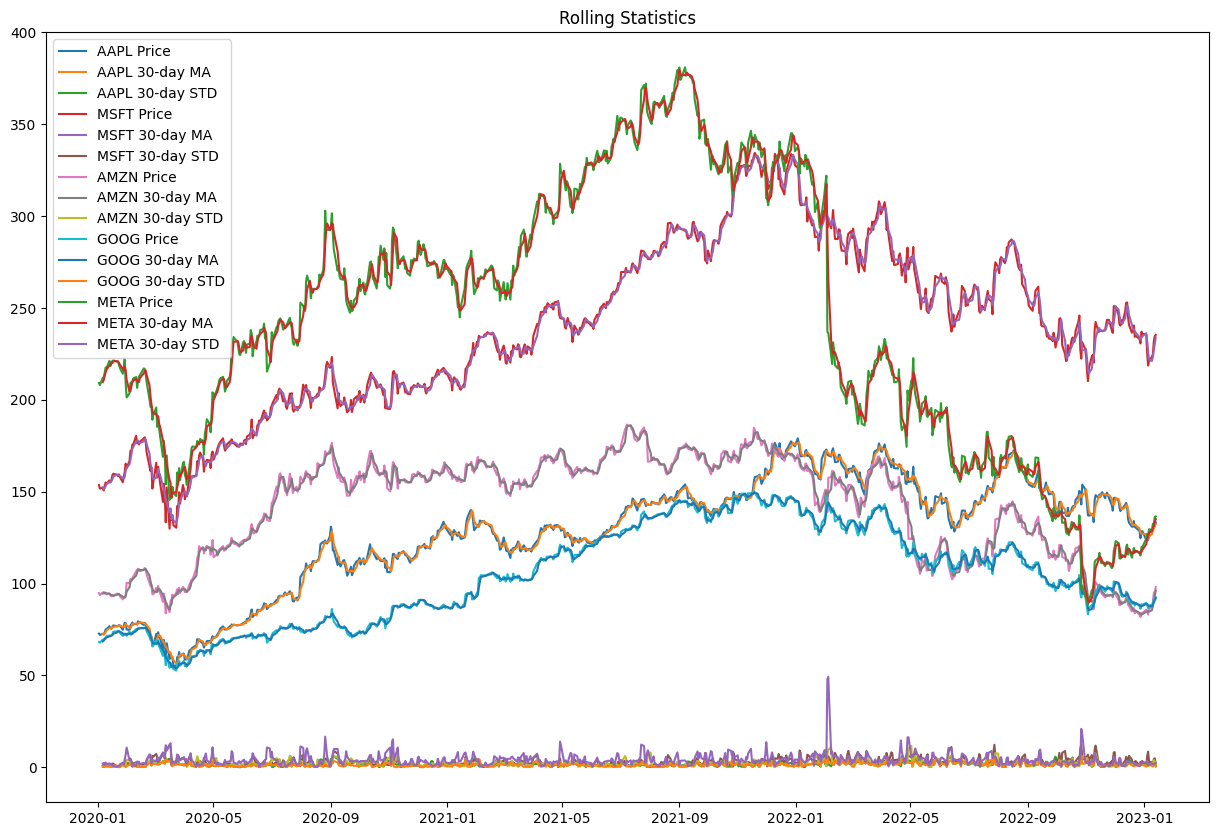

In [180]:
# Rolling Statistics
rolling_mean = historical_data.rolling(window=3).mean() # change this based on the time period you wanna use.
rolling_std = historical_data.rolling(window=3).std() # change this based on the time period you wanna use.

plt.figure(figsize=(15, 10))
for symbol in ticker_symbols:
    plt.plot(historical_data.index, historical_data[symbol], label=f'{symbol} Price')
    plt.plot(rolling_mean.index, rolling_mean[symbol], label=f'{symbol} 30-day MA')
    plt.plot(rolling_std.index, rolling_std[symbol], label=f'{symbol} 30-day STD')
plt.legend()
plt.title('Rolling Statistics')
plt.show()


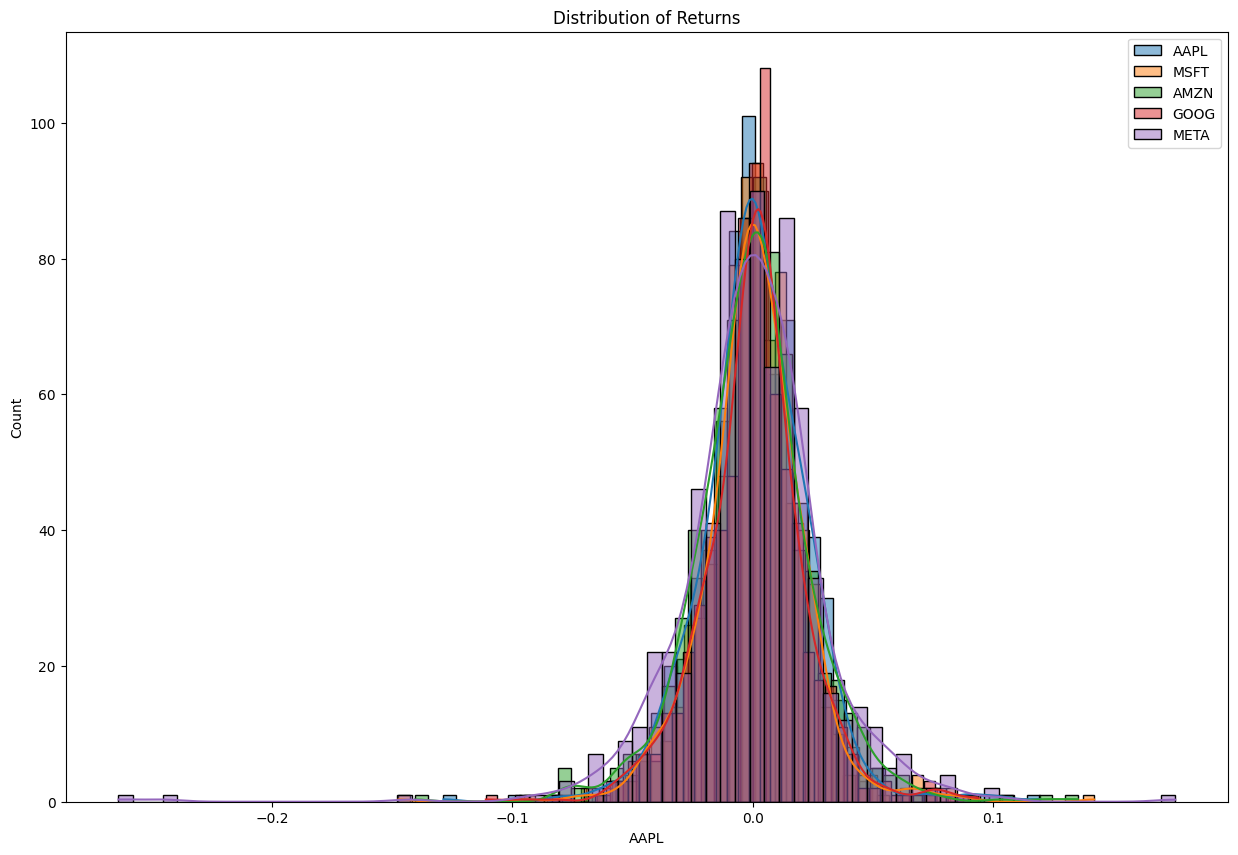

In [181]:
# Distribution Analysis
plt.figure(figsize=(15, 10))
for symbol in ticker_symbols:
    # containing daily returns
    sns.histplot(returns_D1[symbol], kde=True, label=symbol)
plt.legend()
plt.title('Distribution of Returns')
plt.show()

Longer left tail - classic equity market. (Write furhter)


In [182]:
# Skewness and Kurtosis
skewness = returns_D1.skew()
kurtosis = returns_D1.kurtosis()
print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Skewness:
 AAPL    0.089164
MSFT   -0.011253
AMZN    0.106382
GOOG   -0.038651
META   -1.302008
dtype: float64

Kurtosis:
 AAPL     4.021005
MSFT     6.350632
AMZN     3.842166
GOOG     3.094932
META    14.308140
dtype: float64


In [183]:
# Value at Risk (VaR)
var_95 = returns_D1.quantile(0.05)
print("\nValue at Risk (95%):\n", var_95)



Value at Risk (95%):
 AAPL   -0.034955
MSFT   -0.033705
AMZN   -0.036958
GOOG   -0.034678
META   -0.044398
Name: 0.05, dtype: float64


<Figure size 1500x1000 with 0 Axes>

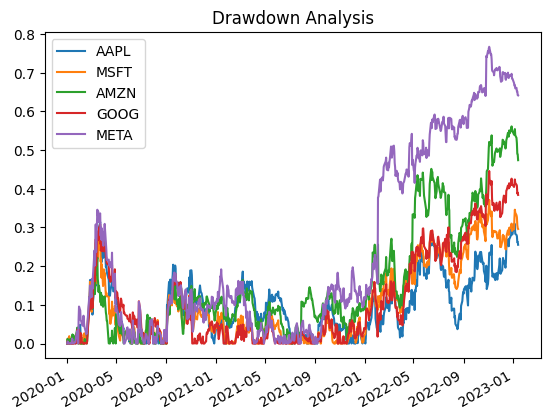

In [184]:
# Drawdown Analysis
def calculate_drawdown(data):
    return (data.cummax() - data) / data.cummax()

drawdowns = calculate_drawdown(historical_data)
plt.figure(figsize=(15, 10))
drawdowns.plot()
plt.title('Drawdown Analysis')
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Figure size 1500x1000 with 0 Axes>

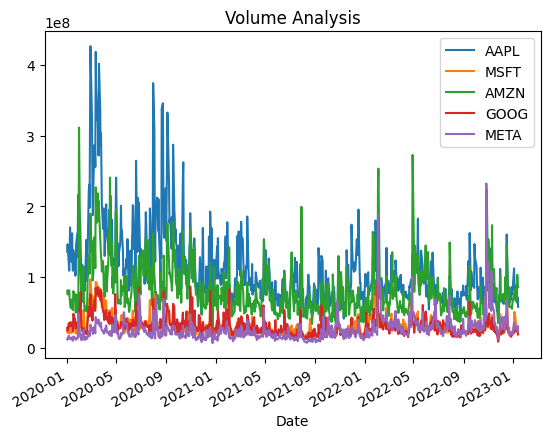

In [185]:
# Volume Analysis (if available)
volume_data = pd.DataFrame()
for ticker_symbol in ticker_symbols:
    data = yf.download(ticker_symbol, start=start_date, end=end_date)
    volume_data[ticker_symbol] = data['Volume']

plt.figure(figsize=(15, 10))
volume_data.plot()
plt.title('Volume Analysis')
plt.show()

In [186]:
#Beta Calculation
market_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
market_returns = market_data.pct_change().dropna()
market_returns_1d = market_returns.squeeze().values

beta_data = []

for symbol in ticker_symbols:
    covariance = np.cov(returns_D1[symbol], market_returns_1d)[0,1]
    market_variance = np.var(market_returns_1d)
    beta = covariance / market_variance
    beta_data.append({'Symbol': symbol, 'Beta': beta})

beta_df = pd.DataFrame(beta_data)
print("\nBetas DataFrame:")
print(beta_df)

[*********************100%***********************]  1 of 1 completed


Betas DataFrame:
  Symbol      Beta
0   AAPL  1.199614
1   MSFT  1.172479
2   AMZN  1.009316
3   GOOG  1.093581
4   META  1.245851


In [187]:
# Check for missing values
if historical_data.isnull().values.any():
    print("Missing values detected. Filling missing values with forward fill.")
    historical_data.ffill(inplace=True)  # Forward fill
    historical_data.bfill(inplace=True)  # Backward fill as a fallback

In [189]:
historical_data

,AAPL,MSFT,AMZN,GOOG,META
0,-1.820346,-1.808149,-1.660698,-1.361582,-0.465377
1,-1.843705,-1.848794,-1.701462,-1.374156,-0.480460
2,-1.824746,-1.840463,-1.652082,-1.311288,-0.427056
3,-1.836025,-1.869930,-1.645040,-1.312918,-0.420805
4,-1.797627,-1.818920,-1.671384,-1.292344,-0.391453
...,...,...,...,...,...
760,0.027992,-0.324631,-1.927518,-0.595877,-1.556703
761,0.046937,-0.288468,-1.838702,-0.579388,-1.508870
762,0.137086,-0.143811,-1.653993,-0.466208,-1.510229
763,0.134473,-0.086534,-1.647624,-0.479325,-1.458319


Have to do sector analysis.

Relevant data time horizon, then

Performance analysis, look at it after, LSTM

# New Section

In [190]:
historical_data.head()

,AAPL,MSFT,AMZN,GOOG,META
0,-1.820346,-1.808149,-1.660698,-1.361582,-0.465377
1,-1.843705,-1.848794,-1.701462,-1.374156,-0.480460
2,-1.824746,-1.840463,-1.652082,-1.311288,-0.427056
3,-1.836025,-1.869930,-1.645040,-1.312918,-0.420805
4,-1.797627,-1.818920,-1.671384,-1.292344,-0.391453


In [191]:
def create_xy(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        end_ix = i + time_step
        if end_ix > len(data)-1:
            break
        seq_x = data[i:end_ix]
        X.append(seq_x)
        y.append(data[end_ix])
    return np.array(X), np.array(y)

In [192]:
assets = historical_data.columns

AAPL - Epoch [1/100], Loss: 1.1166
AAPL - Epoch [11/100], Loss: 0.6600
AAPL - Epoch [21/100], Loss: 0.1364
AAPL - Epoch [31/100], Loss: 0.0348
AAPL - Epoch [41/100], Loss: 0.0189
AAPL - Epoch [51/100], Loss: 0.0197
AAPL - Epoch [61/100], Loss: 0.0180
AAPL - Epoch [71/100], Loss: 0.0154
AAPL - Epoch [81/100], Loss: 0.0135
AAPL - Epoch [91/100], Loss: 0.0121
AAPL - Validation Loss: 0.0147, Test Loss: 0.0092
MSFT - Epoch [1/100], Loss: 1.2394
MSFT - Epoch [11/100], Loss: 0.7523
MSFT - Epoch [21/100], Loss: 0.1305
MSFT - Epoch [31/100], Loss: 0.0377
MSFT - Epoch [41/100], Loss: 0.0343
MSFT - Epoch [51/100], Loss: 0.0324
MSFT - Epoch [61/100], Loss: 0.0261
MSFT - Epoch [71/100], Loss: 0.0215
MSFT - Epoch [81/100], Loss: 0.0187
MSFT - Epoch [91/100], Loss: 0.0165
MSFT - Validation Loss: 0.0173, Test Loss: 0.0118
AMZN - Epoch [1/100], Loss: 0.9927
AMZN - Epoch [11/100], Loss: 0.5457
AMZN - Epoch [21/100], Loss: 0.1173
AMZN - Epoch [31/100], Loss: 0.0896
AMZN - Epoch [41/100], Loss: 0.0380
AMZ

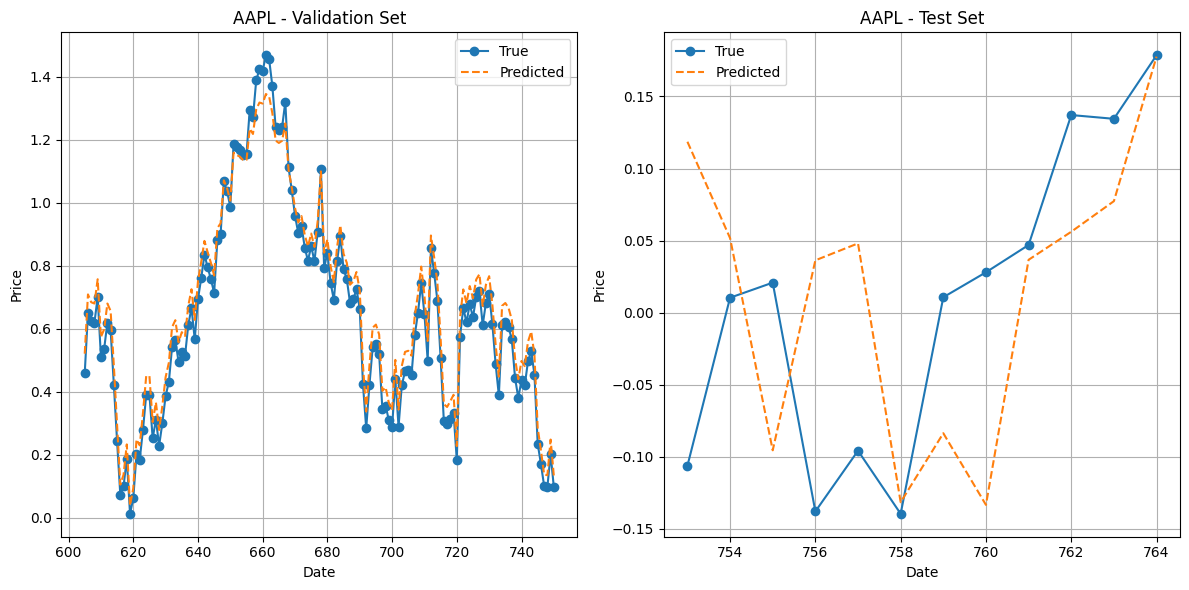

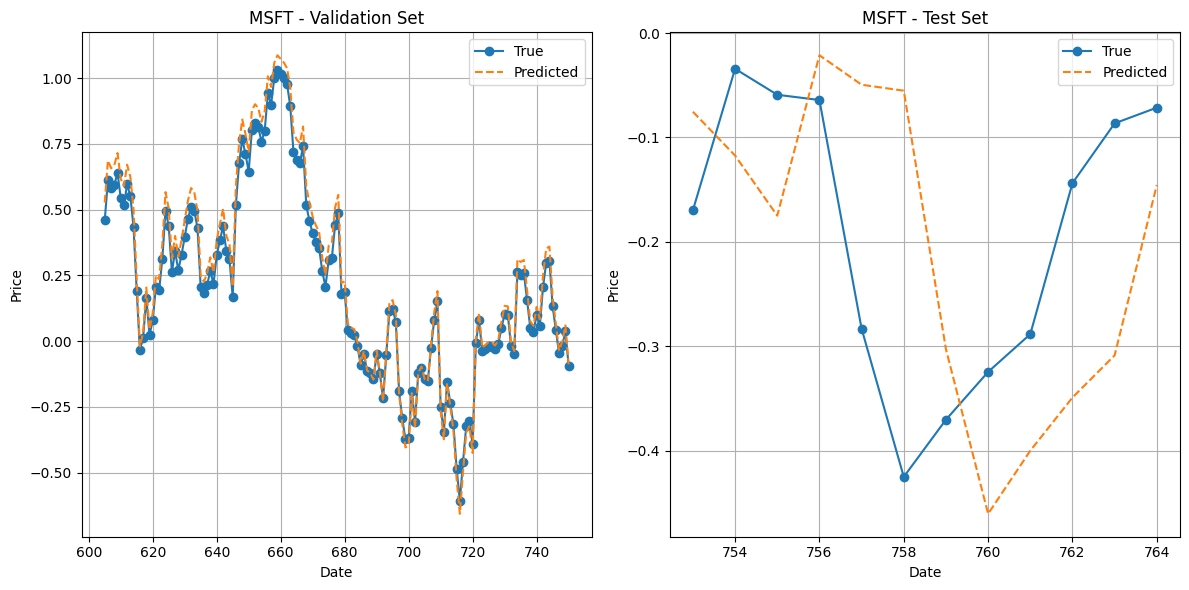

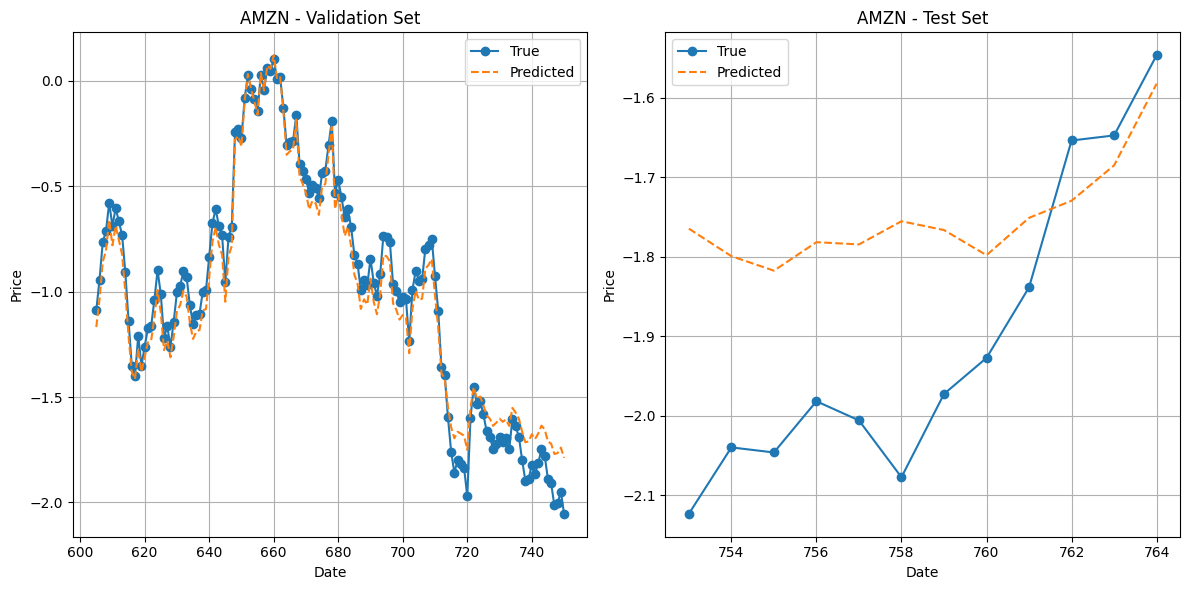

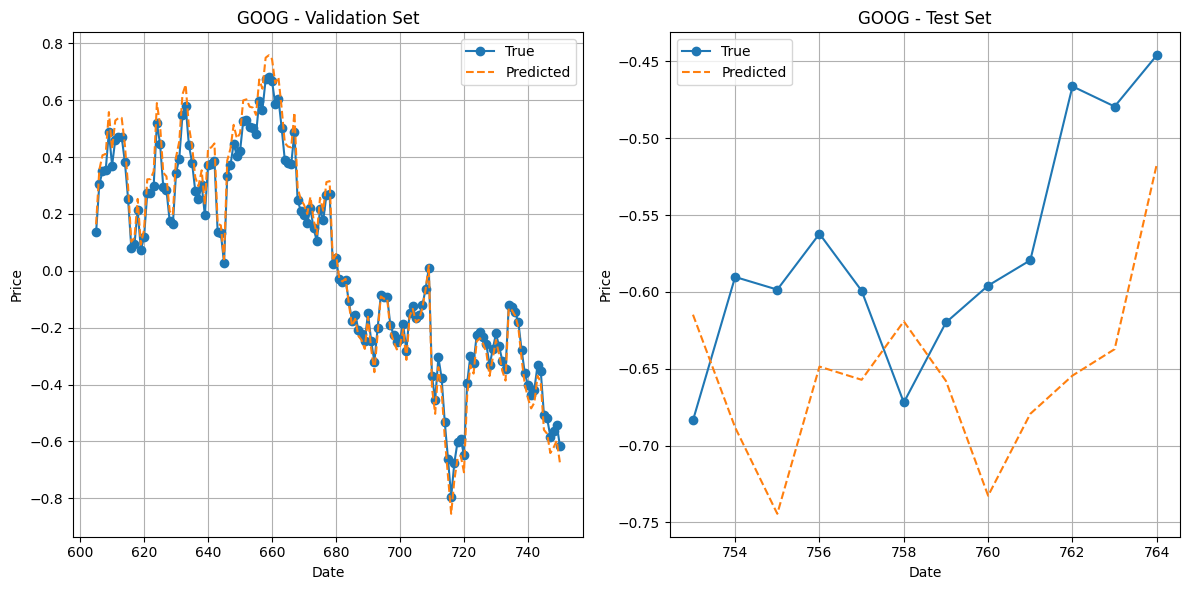

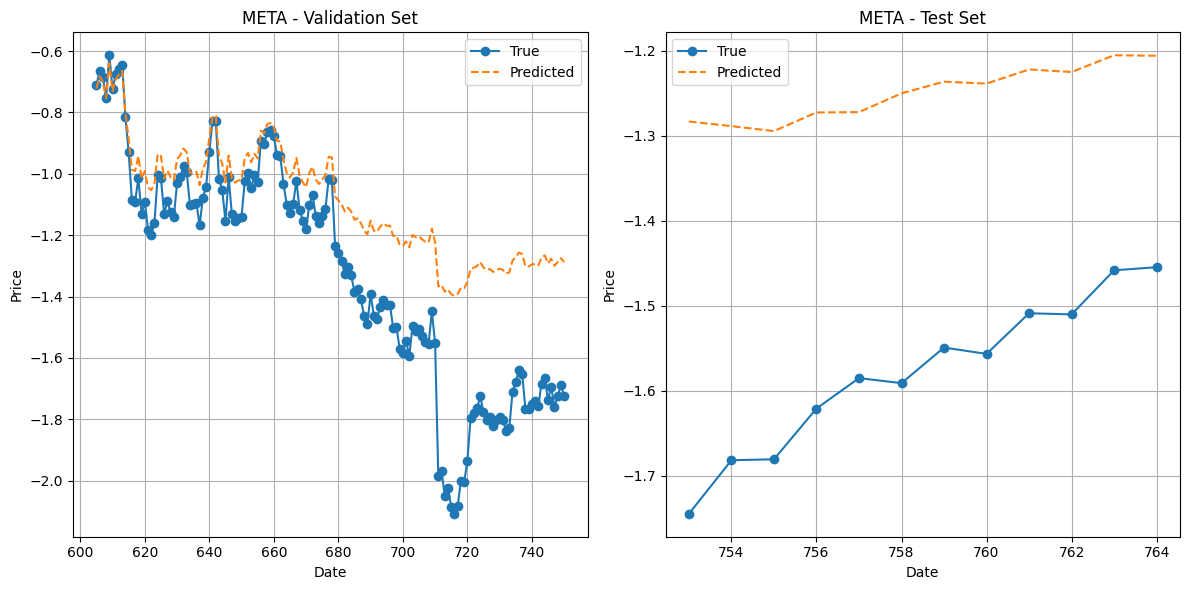

In [195]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        if len(x.shape) == 2:
            x = x.unsqueeze(0)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, (_, _) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out.squeeze()

def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(X).numpy()
        actual = y.numpy()
        mae = np.mean(np.abs(actual - predictions))
        mse = np.mean((actual - predictions)**2)
        rmse = np.sqrt(mse)
        mape = np.mean(np.abs((actual - predictions) / actual)) * 100
        mpe = np.mean((actual - predictions) / actual) * 100
    return mae, mse, rmse, mape, mpe

# Training parameters
train_ratio = 0.79
val_ratio = 0.19
test_ratio = 0.02
epochs = 100
model_perf_df = pd.DataFrame(columns=assets)
all_predictions = {}
y_pred_test_dict = {}
y_true_test_dict = {}
# Initialize a dictionary to store scalers for each stock
scalers = {}

for ticker in historical_data.columns:
    # Create a scaler for each stock
    scaler = StandardScaler()

    # Fit and transform the data for the current stock
    historical_data[ticker] = scaler.fit_transform(historical_data[ticker].values.reshape(-1, 1)).flatten()

    # Store the scaler for later use (e.g., for inverse transformation)
    scalers[ticker] = scaler

for ticker in historical_data.columns:
    # Prepare data
    X, y = create_xy(historical_data[ticker].values, time_step=1)

    X_train, X_val, X_test = X[:605], X[605:751], X[751:]
    y_train, y_val, y_test = y[:605], y[605:751], y[751:]

    # Convert to tensors
    X_train_tensors = torch.FloatTensor(X_train).unsqueeze(-1)
    X_val_tensors = torch.FloatTensor(X_val).unsqueeze(-1)
    X_test_tensors = torch.FloatTensor(X_test).unsqueeze(-1)
    y_train_tensors = torch.FloatTensor(y_train)
    y_val_tensors = torch.FloatTensor(y_val)
    y_test_tensors = torch.FloatTensor(y_test)

    # Initialize model and optimizer
    model = LSTMModel(input_dim=1, hidden_dim=32, num_layers=2, output_dim=1)
    optimizer = optim.AdamW(model.parameters(), lr=0.01, weight_decay=1e-5)
    criterion = nn.MSELoss()

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensors)
        loss = criterion(outputs, y_train_tensors)
        loss.backward()
        optimizer.step()

        if epoch % 10 == 0:
            print(f'{ticker} - Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
    # Evaluation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensors)
        test_outputs = model(X_test_tensors)
        val_loss = criterion(val_outputs, y_val_tensors)
        test_loss = criterion(test_outputs, y_test_tensors)
        print(f'{ticker} - Validation Loss: {val_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        # Store predictions
        all_predictions[ticker] = {
            'validation': val_outputs.numpy(),
            'test': test_outputs.numpy()
        }
        # Save y_pred_test for each stock
        y_pred_test_dict[ticker] = test_outputs.numpy()
        y_true_test_dict[ticker] = y_test_tensors.numpy()
        # Evaluate model performance
        mae_val, mse_val, rmse_val, mape_val, mpe_val = evaluate_model(model, X_val_tensors, y_val_tensors)
        mae_test, mse_test, rmse_test, mape_test, mpe_test = evaluate_model(model, X_test_tensors, y_test_tensors)
        model_perf_df[ticker] = [
            [mae_val, mse_val, rmse_val, mape_val, mpe_val],
            [mae_test, mse_test, rmse_test, mape_test, mpe_test]
        ]

print("\nModel Performance Metrics:")
print(model_perf_df)

# When plotting or evaluating, use the stored scalers to inverse transform the data
for ticker in historical_data.columns:
    # Get the true and predicted values for the current asset
    y_true_val = historical_data[ticker][605:751]
    y_true_test = historical_data[ticker][753:]
    y_pred_val = all_predictions[ticker]['validation']
    y_pred_test = all_predictions[ticker]['test']

    # Inverse transform the data
    y_true_val_rescaled = scalers[ticker].inverse_transform(y_true_val.values.reshape(-1, 1)).flatten()
    y_true_test_rescaled = scalers[ticker].inverse_transform(y_true_test.values.reshape(-1, 1)).flatten()
    y_pred_val_rescaled = scalers[ticker].inverse_transform(y_pred_val.reshape(-1, 1)).flatten()
    y_pred_test_rescaled = scalers[ticker].inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

    # Plot using the rescaled data
    plt.figure(figsize=(12, 6))

    # Validation set
    plt.subplot(1, 2, 1)
    plt.plot(y_true_val.index, y_true_val_rescaled, label='True', marker='o')
    plt.plot(y_true_val.index, y_pred_val_rescaled, label='Predicted', linestyle='--')
    plt.title(f'{ticker} - Validation Set')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    # Test set
    plt.subplot(1, 2, 2)
    plt.plot(y_true_test.index, y_true_test_rescaled, label='True', marker='o')
    plt.plot(y_true_test.index, y_pred_test_rescaled, label='Predicted', linestyle='--')
    plt.title(f'{ticker} - Test Set')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [162]:
import numpy as np
from scipy.optimize import minimize

def optimize_portfolio(data_dict, max_leverage=2.0):
    num_assets = len(data_dict)

    # Calculate percentage change from initial to final value
    percent_changes = np.array([
        (data_dict[ticker][-1] - data_dict[ticker][0]) / data_dict[ticker][0]
        for ticker in data_dict
    ])

    # Define the objective function (negative of the weighted average percent change)
    def objective(weights):
        return -np.sum(percent_changes * weights)

    # Define constraints
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(np.abs(x)) - max_leverage},  # Leverage constraint
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Sum of weights = 1 constraint
    ]

    # Define bounds (-2 to 2 for each asset, allowing 200% short)
    bounds = [(-2, 2) for _ in range(num_assets)]

    # Initial guess (equal weights)
    initial_weights = np.array([1/num_assets] * num_assets)

    # Optimize
    result = minimize(objective, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    if result.success:
        optimal_weights = result.x
        expected_portfolio_return = np.sum(percent_changes * optimal_weights)

        return {
            'weights': optimal_weights,
            'expected_return': expected_portfolio_return
        }
    else:
        return None

# Optimize for predicted test data
pred_result = optimize_portfolio(y_pred_test_dict)

# Optimize for true test data
true_result = optimize_portfolio(y_true_test_dict)

# Print results for predicted test data
if pred_result:
    print("Predicted Test Data Optimization Results:")
    print("Optimal weights:")
    for ticker, weight in zip(y_pred_test_dict.keys(), pred_result['weights']):
        print(f"{ticker}: {weight:.4f}")
    print(f"Sum of weights: {np.sum(pred_result['weights']):.4f}")
    print(f"Expected portfolio return: {pred_result['expected_return']:.4f}")
else:
    print("Optimization for predicted test data failed to converge.")

print("\n")

Predicted Test Data Optimization Results:
Optimal weights:
AAPL: -0.5000
MSFT: 1.2788
AMZN: 0.0769
GOOG: 0.0144
META: 0.1299
Sum of weights: 1.0000
Expected portfolio return: 0.8967




In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate true returns using optimal weights
optimal_weights = np.array([-0.5000, 1.2788, 0.0769, 0.0144, 0.1299])
true_returns = np.sum(prediction_returns.mul(optimal_weights, axis=1))
true_portfolio_return = true_returns.sum()

print("True Portfolio Return:", true_portfolio_return)

True Portfolio Return: 0.14208269523385564


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [235]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize

# Define ticker symbols and date range
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG', 'META']
start_date = '2020-01-01'
end_date = '2023-01-01'
prediction_end_date = '2023-01-15'

# Download historical data
historical_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Calculate returns
returns = historical_data.pct_change().dropna()

# Calculate volatility
volatility = returns.std()

# Existing portfolio functions (inverse_volatility_portfolio, mean_variance_portfolio, global_min_variance_portfolio) remain unchanged

# Equal Weight Portfolio
def equal_weight_portfolio(n_assets):
    return np.array([1/n_assets] * n_assets)

# Calculate portfolio weights
inv_vol_weights = inverse_volatility_portfolio(volatility)
mean_var_weights = mean_variance_portfolio(returns)
gmv_weights = global_min_variance_portfolio(returns)
equal_weights = equal_weight_portfolio(len(tickers))

# Download prediction period data
prediction_data = yf.download(tickers, start=end_date, end=prediction_end_date)['Adj Close']
prediction_returns = prediction_data.pct_change().dropna()

# Calculate portfolio returns
inv_vol_return = np.sum(prediction_returns.mul(inv_vol_weights, axis=1))
mean_var_return = np.sum(prediction_returns.mul(mean_var_weights, axis=1))
gmv_return = np.sum(prediction_returns.mul(gmv_weights, axis=1))
equal_weight_return = np.sum(prediction_returns.mul(equal_weights, axis=1))

# Download S&P 500 data
sp500 = yf.Ticker("^GSPC")
sp500_data = sp500.history(start=end_date, end=prediction_end_date)
sp500_return = (sp500_data['Close'][-1] / sp500_data['Close'][0]) - 1

# Download risk-free rate data (10-Year Treasury Yield)
risk_free = yf.Ticker("^TNX")
risk_free_data = risk_free.history(start=end_date, end=prediction_end_date)
risk_free_rate = risk_free_data['Close'].mean() / 100  # Convert to decimal and take average

# Print all returns
print("Inverse Volatility Portfolio Return:", inv_vol_return.sum())
print("Mean Variance Portfolio Return:", mean_var_return.sum())
print("Global Minimum Variance Portfolio Return:", gmv_return.sum())
print("Equal Weight Portfolio Return:", equal_weight_return.sum())
print("S&P 500 Return:", sp500_return)
print("Risk-Free Rate:", risk_free_rate)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-235-114f71074733>:46: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sp500_return = (sp500_data['Close'][-1] / sp500_data['Close'][0]) - 1


Inverse Volatility Portfolio Return: 0.06525721433997213
Mean Variance Portfolio Return: 0.09489761600507439
Global Minimum Variance Portfolio Return: 0.05845330937076729
Equal Weight Portfolio Return: 0.0687458387291791
S&P 500 Return: 0.04574890046570812
Risk-Free Rate: 0.03604777759975857


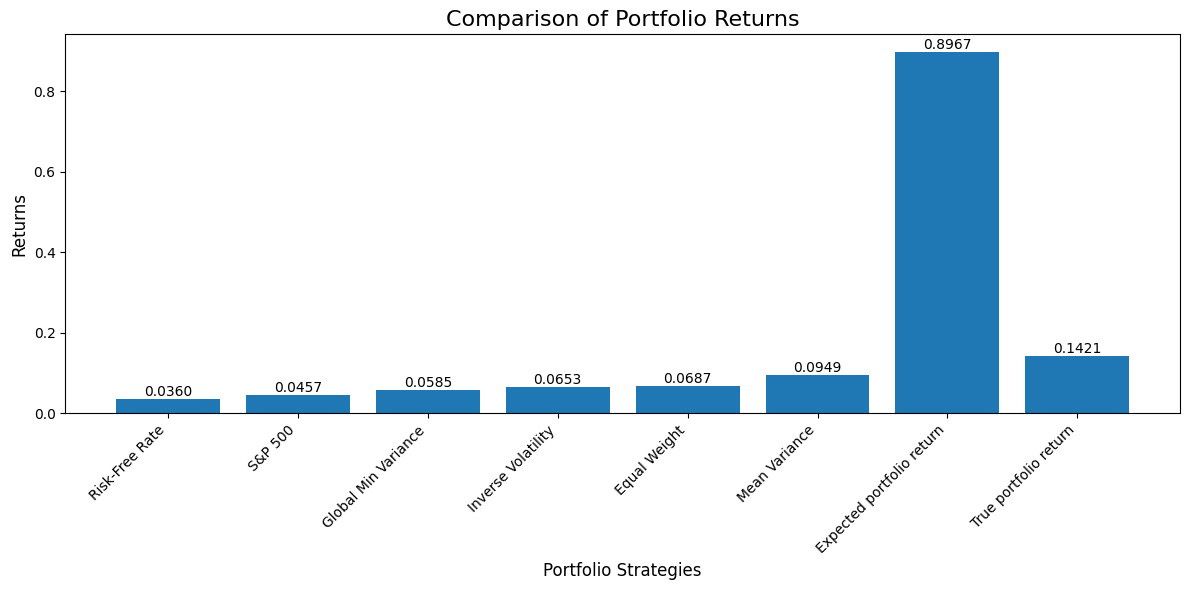

In [239]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
strategies = ['Risk-Free Rate','S&P 500','Global Min Variance','Inverse Volatility', 'Equal Weight','Mean Variance','Expected portfolio return','True portfolio return']
returns = [risk_free_rate, sp500_return, gmv_return.sum(), inv_vol_return.sum(), equal_weight_return.sum(), mean_var_return.sum(), pred_result['expected_return'], true_portfolio_return]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(strategies, returns)

# Customize the chart
plt.title('Comparison of Portfolio Returns', fontsize=16)
plt.xlabel('Portfolio Strategies', fontsize=12)
plt.ylabel('Returns', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()

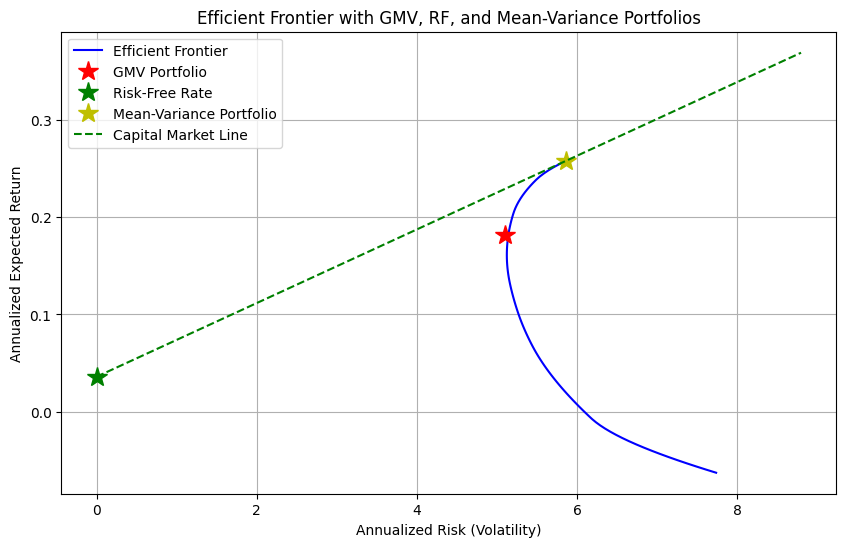

In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Assuming historical_data is your DataFrame with adjusted close prices

# Calculate daily returns
returns = historical_data.pct_change().dropna()

# Calculate annualized returns (assuming 252 trading days in a year)
annualized_returns = returns.mean() * 252

# Calculate the variance-covariance matrix
cov_matrix = returns.cov() * 252

def portfolio_return(weights, returns):
    return np.sum(returns.mean() * weights) * 252

def portfolio_volatility(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

def gmv_portfolio(cov_matrix):
    n = cov_matrix.shape[0]
    ones = np.ones(n)
    inv_cov = np.linalg.inv(cov_matrix)
    weights = np.dot(inv_cov, ones) / np.dot(ones, np.dot(inv_cov, ones))
    return weights

def efficient_frontier(returns, cov_matrix, target_returns):
    n = returns.shape[1]

    def objective(weights):
        return portfolio_volatility(weights, cov_matrix)

    frontier_volatilities = []

    for target in target_returns:
        constraints = (
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x: portfolio_return(x, returns) - target}
        )
        result = minimize(objective, n*[1./n], method='SLSQP', bounds=tuple((0,1) for _ in range(n)), constraints=constraints)
        if result.success:
            frontier_volatilities.append(result.fun)
        else:
            frontier_volatilities.append(np.nan)

    return frontier_volatilities

# Calculate GMV portfolio
gmv_weights = gmv_portfolio(cov_matrix)
gmv_return = portfolio_return(gmv_weights, returns)
gmv_volatility = portfolio_volatility(gmv_weights, cov_matrix)

# Calculate efficient frontier
target_returns = np.linspace(annualized_returns.min(), annualized_returns.max(), 100)
frontier_volatilities = efficient_frontier(returns, cov_matrix, target_returns)

# Remove any NaN values
valid_indices = ~np.isnan(frontier_volatilities)
frontier_volatilities = np.array(frontier_volatilities)[valid_indices]
target_returns = target_returns[valid_indices]

# Plot the efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(frontier_volatilities, target_returns, 'b-', label='Efficient Frontier')

# Plot GMV portfolio
plt.plot(gmv_volatility, gmv_return, 'r*', markersize=15, label='GMV Portfolio')

# Plot risk-free rate
rf_rate = 0.036
plt.plot(0, rf_rate, 'g*', markersize=15, label='Risk-Free Rate')

# Plot tangency portfolio (Mean-Variance portfolio)
sharpe_ratios = (target_returns - rf_rate) / frontier_volatilities
tangency_idx = np.argmax(sharpe_ratios)
plt.plot(frontier_volatilities[tangency_idx], target_returns[tangency_idx], 'y*', markersize=15, label='Mean-Variance Portfolio')

# Plot the Capital Market Line (CML)
cml_x = np.linspace(0, frontier_volatilities[tangency_idx] * 1.5, 100)
cml_y = rf_rate + (target_returns[tangency_idx] - rf_rate) * (cml_x / frontier_volatilities[tangency_idx])
plt.plot(cml_x, cml_y, 'g--', label='Capital Market Line')

plt.xlabel('Annualized Risk (Volatility)')
plt.ylabel('Annualized Expected Return')
plt.title('Efficient Frontier with GMV, RF, and Mean-Variance Portfolios')
plt.legend()
plt.grid(True)
plt.show()